<a href="https://colab.research.google.com/github/Tanmoy04/FloodRisk_Predictor_Assam/blob/main/FloodRisk_Predictor_Assam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Rainfall_Data_LL.csv to Rainfall_Data_LL.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("Rainfall_Data_LL.csv")

In [ ]:
df.head()

,Name,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
0,ROW212,Assam & Meghalaya,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,...,163.7,115.6,1.2,2498.7,46.6,460.6,1711.0,280.5,25.914603,91.844758
1,ROW213,Assam & Meghalaya,1902,9.3,10.2,105.6,350.0,262.1,620.7,510.8,...,97.0,7.8,1.3,2952.1,19.5,717.7,2108.8,106.1,25.914603,91.844758
2,ROW214,Assam & Meghalaya,1903,19.9,25.4,103.6,140.6,206.6,607.4,362.7,...,159.5,59.3,1.3,2544.6,45.3,450.8,1828.4,220.1,25.914603,91.844758
3,ROW215,Assam & Meghalaya,1904,11.1,56.1,51.9,457.1,375.2,385.7,477.6,...,115.9,46.4,2.5,2664.2,67.2,884.2,1548.0,164.8,25.914603,91.844758
4,ROW216,Assam & Meghalaya,1905,19.9,16.9,137.9,213.0,275.5,521.7,439.1,...,200.0,16.8,24.8,2790.7,36.8,626.4,1885.9,241.6,25.914603,91.844758


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            117 non-null    object 
 1   SUBDIVISION     117 non-null    object 
 2   YEAR            117 non-null    int64  
 3   JAN             117 non-null    float64
 4   FEB             117 non-null    float64
 5   MAR             117 non-null    float64
 6   APR             117 non-null    float64
 7   MAY             117 non-null    float64
 8   JUN             117 non-null    float64
 9   JUL             117 non-null    float64
 10  AUG             117 non-null    float64
 11  SEP             117 non-null    float64
 12  OCT             117 non-null    float64
 13  NOV             117 non-null    float64
 14  DEC             117 non-null    float64
 15  ANNUAL          117 non-null    float64
 16  Jan-Feb         117 non-null    float64
 17  Mar-May         117 non-null    flo

In [ ]:
df.isnull().sum()

,0
Name,0
SUBDIVISION,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0


Creating a Flood Risk Category

In [ ]:
low_threshold = np.percentile(df['ANNUAL'], 33)
high_threshold = np.percentile(df['ANNUAL'], 66)

def classify_risk(rainfall):
  if rainfall <= low_threshold:
    return "Low"
  elif rainfall < high_threshold:
    return "Moderate"
  else:
    return "High"

df['Flood_Risk'] = df['ANNUAL'].apply(classify_risk)

df['Flood_Risk'].value_counts()

,count
Flood_Risk,
High,40
Low,39
Moderate,38


Ploting the Distribution of Flood Risk Levels

<ipython-input-12-3a0a1f665b8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Flood_Risk'], palette='coolwarm', order=['Low', 'Moderate', 'High'])


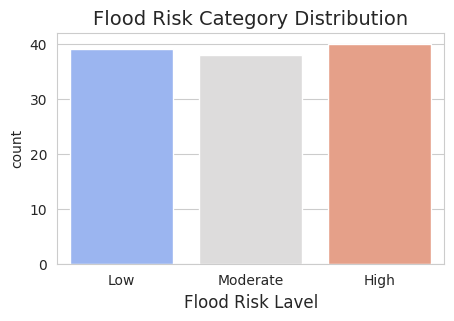

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,3))
sns.countplot(x=df['Flood_Risk'], palette='coolwarm', order=['Low', 'Moderate', 'High'])
plt.title("Flood Risk Category Distribution", fontsize = 14)
plt.xlabel("Flood Risk Lavel", fontsize=12)
plt.show()

Analyzing Annual Rainfall by Flood

<ipython-input-13-eadd77fc947e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Flood_Risk'], y=df['ANNUAL'], palette='coolwarm', order=['Low', 'Moderate', 'High'])


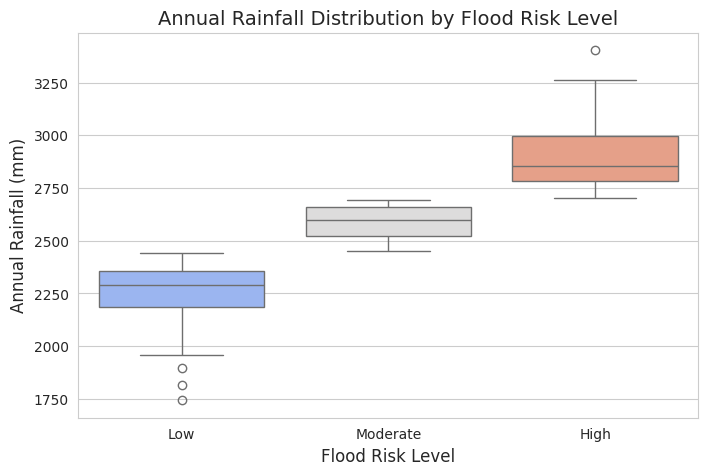

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Flood_Risk'], y=df['ANNUAL'], palette='coolwarm', order=['Low', 'Moderate', 'High'])
plt.title("Annual Rainfall Distribution by Flood Risk Level", fontsize=14)
plt.xlabel("Flood Risk Level", fontsize=12)
plt.ylabel("Annual Rainfall (mm)", fontsize=12)
plt.show()

Train-Test Split & Model Selection

In [ ]:
X = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
        'ANNUAL', 'Jan-Feb', 'Mar-May', 'June-September', 'Oct-Dec', 'Latitude', 'Longitude']]
y = df['Flood_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Data: ", X_train.shape, y_train.shape)
print("Testing Data: ", X_test.shape, y_test.shape)

Training Data:  (93, 19) (93,)
Testing Data:  (24, 19) (24,)


Training a Classification Model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         8
         Low       0.89      1.00      0.94         8
    Moderate       1.00      0.88      0.93         8

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24


Confusion Matrix:
 [[8 0 0]
 [0 8 0]
 [0 1 7]]


Feature Importance Analysis

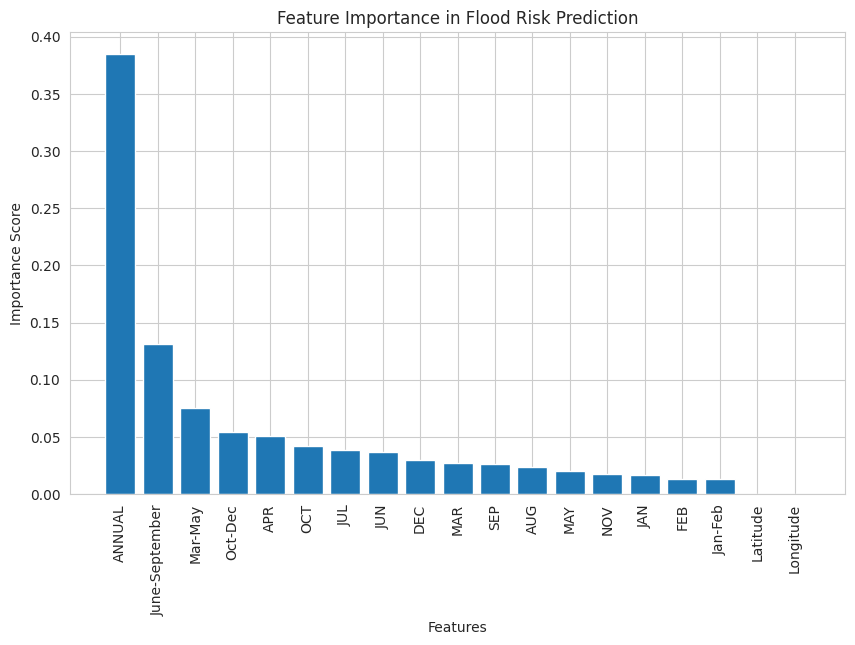

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Flood Risk Prediction")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

Hyperparameter Tuning for Better Performance

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predictions & accuracy
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Model Accuracy: {accuracy_best:.2f}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Model Accuracy: 0.96


Check Misclassifications:

In [ ]:
misclassified = X_test[(y_test != y_pred_best)]
print(misclassified)

    JAN   FEB    MAR   APR    MAY    JUN    JUL    AUG    SEP   OCT   NOV  \
39  1.5  57.9  180.8  72.6  391.9  500.5  435.4  330.8  353.7  98.1  19.0   

    DEC  ANNUAL  Jan-Feb  Mar-May  June-September  Oct-Dec   Latitude  \
39  9.5  2451.7     59.4    645.3          1620.4    126.6  25.914603   

    Longitude  
39  91.844758  
